In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
#первичный анализ данных, фича инжиниринг, обучение стандартной моделью Ridge

df = pd.read_csv('ml-course-main/data/laptop_price.csv', encoding = "ISO-8859-1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df['Cpus'] = 0
df['Gpus'] = 0
df['StorageVolume'] = 0
df['StorageType'] = 0
df['Screen'] = 0
df['StorageVolumeCategory'] = 0
df['StorageTypeCategory'] = 0
df['ScreenCategory'] = 0
df['CpuCategory'] = 0
df['GpuCategory'] = 0
df['TypeCategory'] = 0

for i in df:
    df['Cpus'] = df['Cpu'].str.extract('([A-Z a-z a-z]+)\d')
for i in df:
    df['Gpus'] = df['Gpu'].str.extract('([A-Z a-z a-z]+)\d')
df.loc[(df['Gpus'].isnull()), 'Gpus'] = 'Intel HD Graphics'
for i in df:
    df['StorageVolume'] = df['Memory'].str.extract('([0-9]+[A-Z]+)')
for i in df:
    df['StorageType'] = df['Memory'].str.replace(r'([0-9]+[A-Z]+) ', '')   
for i in df:
    df['Screen'] = df['ScreenResolution'].str.extract('([0-9]+)')
for i in df:
    df['Weight'] = df['Weight'].str.extract('([^kg]+)')
for i in df:
    df['Ram'] = df['Ram'].str.extract('([^GB]+)')
    
df = df.astype({'Screen':'int'})
df.loc[df['Screen'] == 1920, 'ScreenCategory'] = 1
df.loc[(df['Screen'] > 1920) & (df['Screen'] < 2880), 'ScreenCategory'] = 2
df.loc[df['Screen'] >= 2880, 'ScreenCategory'] = 3

df.loc[df['StorageType'] == 'Flash Storage', 'StorageTypeCategory'] = 1
df.loc[df['StorageType'] == 'SSD', 'StorageTypeCategory'] = 2
df.loc[df['StorageType'] == 'SSD +  HDD', 'StorageTypeCategory'] = 3

df.loc[(df['StorageVolume'] == '128GB') | (df['StorageVolume'] == '256GB'), 'StorageVolumeCategory'] = 1
df.loc[(df['StorageVolume'] == '512GB') | (df['StorageVolume'] == '1TB'), 'StorageVolumeCategory'] = 2
df.loc[df['StorageVolume'] == '2TB', 'StorageVolumeCategory'] = 3

df.loc[(df['Gpus'] == 'Intel Iris Graphics ') | (df['Gpus'] == 'Intel Iris Plus Graphics ') | (df['Gpus'] == 'Nvidia GeForce GT ') | (df['Gpus'] == 'Nvidia GeForce ') | (df['Gpus'] == 'AMD Radeon ') | (df['Gpus'] == 'Nvidia Quadro M ')  | (df['Gpus'] == 'Nvidia GeForce MX') , 'GpuCategory'] = 1
df.loc[(df['Gpus'] == 'Nvidia GeForce GTX ') | (df['Gpus'] == 'AMD R ') | (df['Gpus'] == 'AMD Radeon R') | (df['Gpus'] == 'AMD FirePro W ') | (df['Gpus'] == 'AMD Radeon ') | (df['Gpus'] == 'AMD Radeon Pro ')  | (df['Gpus'] == 'AMD Radeon RX ') | (df['Gpus'] == 'Nvidia GTX ') | (df['Gpus'] == 'Nvidia Quadro ') , 'GpuCategory'] = 2

df.loc[(df['Cpus'] == 'Intel Core i') | (df['Cpus'] == 'Intel Core M m') | (df['Cpus'] == 'AMD Ryzen') | (df['Cpus'] == 'Intel Xeon E') , 'CpuCategory'] = 1

df.loc[df['TypeName'] == 'Notebook', 'TypeCategory'] = 1
df.loc[df['TypeName'] == 'Gaming', 'TypeCategory'] = 2
df.loc[df['TypeName'] == 'Ultrabook', 'TypeCategory'] = 3
df.loc[df['TypeName'] == '2 in 1 Convertible', 'TypeCategory'] = 4
df.loc[df['TypeName'] == 'Workstation', 'TypeCategory'] = 5




In [4]:
df = df.drop(columns=["Company","laptop_ID","Product","Cpu","Gpu","Cpus","Gpus","OpSys","StorageVolume","StorageType","ScreenResolution","Screen","Memory","TypeName"])
df = df.astype({'Inches':'float','Ram':'int','Weight':'float','Price_euros':'float','StorageVolumeCategory':'int','StorageTypeCategory':'int','ScreenCategory':'int'})
df.shape
df.tail(10)


,Inches,Ram,Weight,Price_euros,StorageVolumeCategory,StorageTypeCategory,ScreenCategory,CpuCategory,GpuCategory,TypeCategory
1293,15.6,8,2.60,899.00,2,0,1,1,2,1
1294,15.6,6,2.04,549.99,0,0,1,0,2,1
1295,15.6,8,2.30,805.99,2,0,0,1,2,1
1296,11.6,2,1.17,209.00,0,1,0,0,0,0
1297,15.6,4,2.20,720.32,0,0,0,1,1,1
1298,14.0,4,1.80,638.00,1,2,1,1,0,4
1299,13.3,16,1.30,1499.00,2,2,3,1,0,4
1300,14.0,2,1.50,229.00,0,1,0,0,0,1
1301,15.6,6,2.19,764.00,2,0,0,1,2,1
1302,15.6,4,2.20,369.00,0,0,0,0,0,1


In [5]:
#подбор множества признаков (RFE)

from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

X_selection = df.drop(columns=["Price_euros"])
y_selection = df['Price_euros']
# отберём с помощью RFE 5 признаков
rfe = RFE(estimator=Ridge(), n_features_to_select=5)
rfe = rfe.fit(X_selection, y_selection)
# выведем эти 5 признаков
print('Selected features: %s' % list(X_selection.columns[rfe.support_]))
to_drop = df.drop(columns=list(X_selection.columns[rfe.support_]))
df = df.drop(columns=to_drop)

Selected features: ['Ram', 'StorageTypeCategory', 'CpuCategory', 'GpuCategory', 'TypeCategory']


In [6]:
df['Price_euros'] = y_selection
df.head()

,Ram,StorageTypeCategory,CpuCategory,GpuCategory,TypeCategory,Price_euros
0,8,2,1,1,3,1339.69
1,8,1,1,0,3,898.94
2,8,2,1,0,1,575.00
3,16,2,1,2,3,2537.45
4,8,2,1,1,3,1803.60


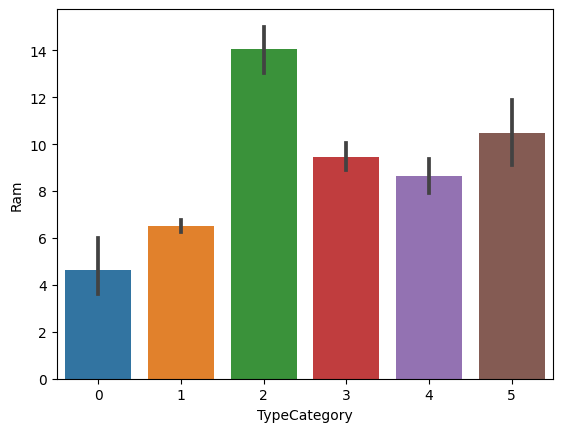

In [7]:
sns.barplot(x = "TypeCategory", y = "Ram", data = df); #в игровых обычно больше всего памяти

In [8]:
df['Ram'].describe()

count    1303.000000
mean        8.382195
std         5.084665
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        64.000000
Name: Ram, dtype: float64

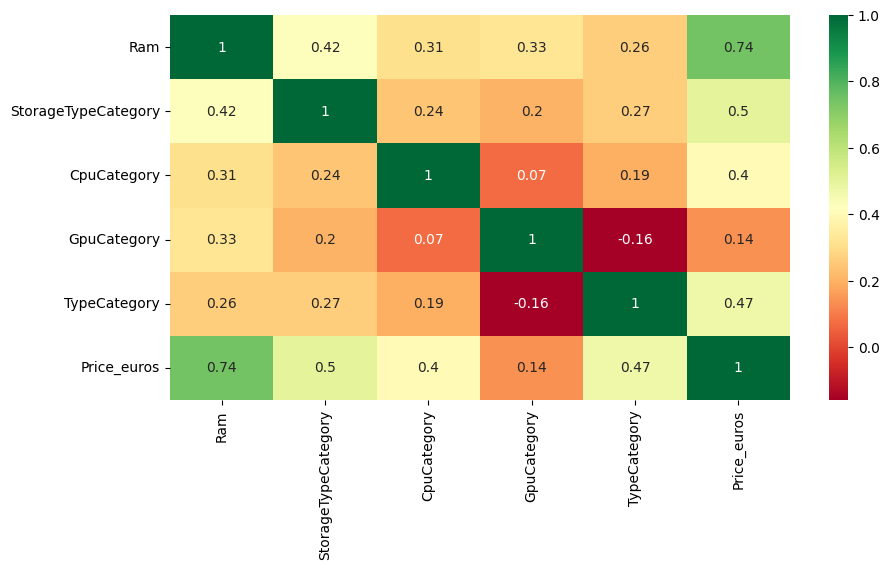

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()
#Между объемом ОЗУ и ценой большая корреляция, а также меду весом и размером экрана. От веса также большая зависимость категории ГПУ.

In [10]:
df['StorageTypeCategory'].value_counts().to_frame().style.background_gradient(cmap='summer')  # ноутбуков по категориям хранилища данных

,StorageTypeCategory
2,637
0,392
3,200
1,74


In [11]:
from sklearn.model_selection import train_test_split

y = df["Price_euros"]
X = df.drop(columns=["Price_euros"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

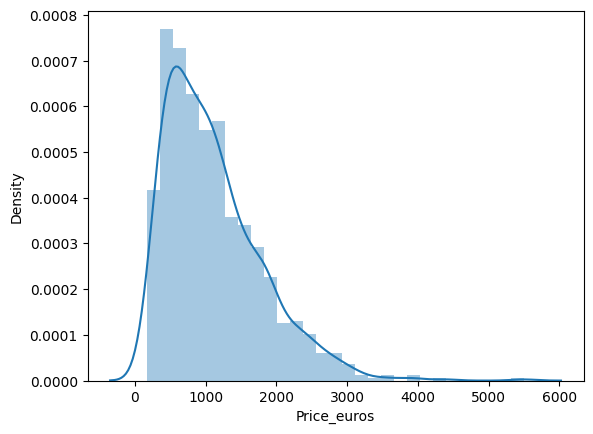

In [12]:
sns.distplot(y_train);

In [13]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

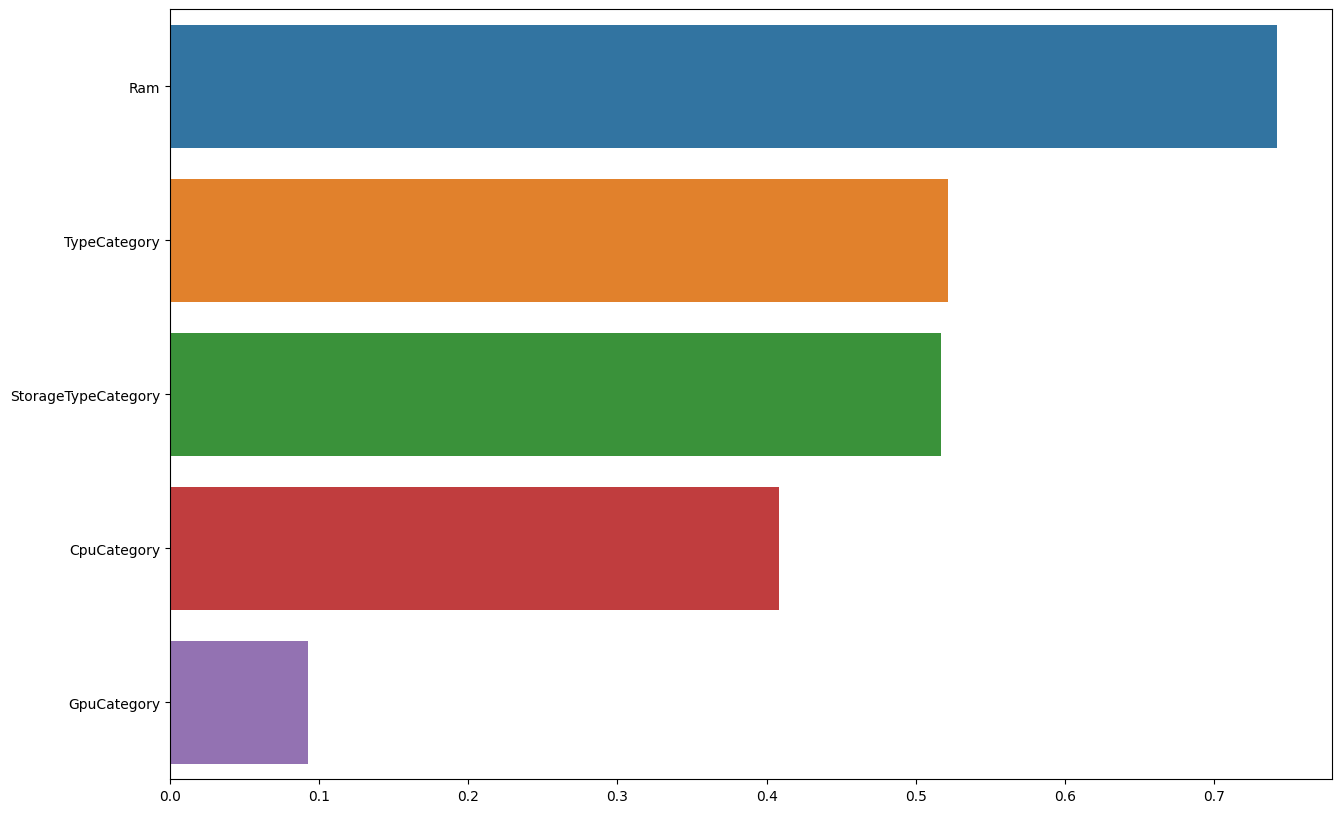

In [14]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))


Test RMSE = 430.41441120718133
Train RMSE = 381.8452130843933


In [16]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 342.8253
	334.2674
	379.0573
	425.6515
	439.3310
Mean CV RMSE = 384.2265


In [17]:
stupid_pred = y_train.mean()
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with stupid predictor = 733.2601484725133
Train RMSE with stupid predictor = 683.6136863320455


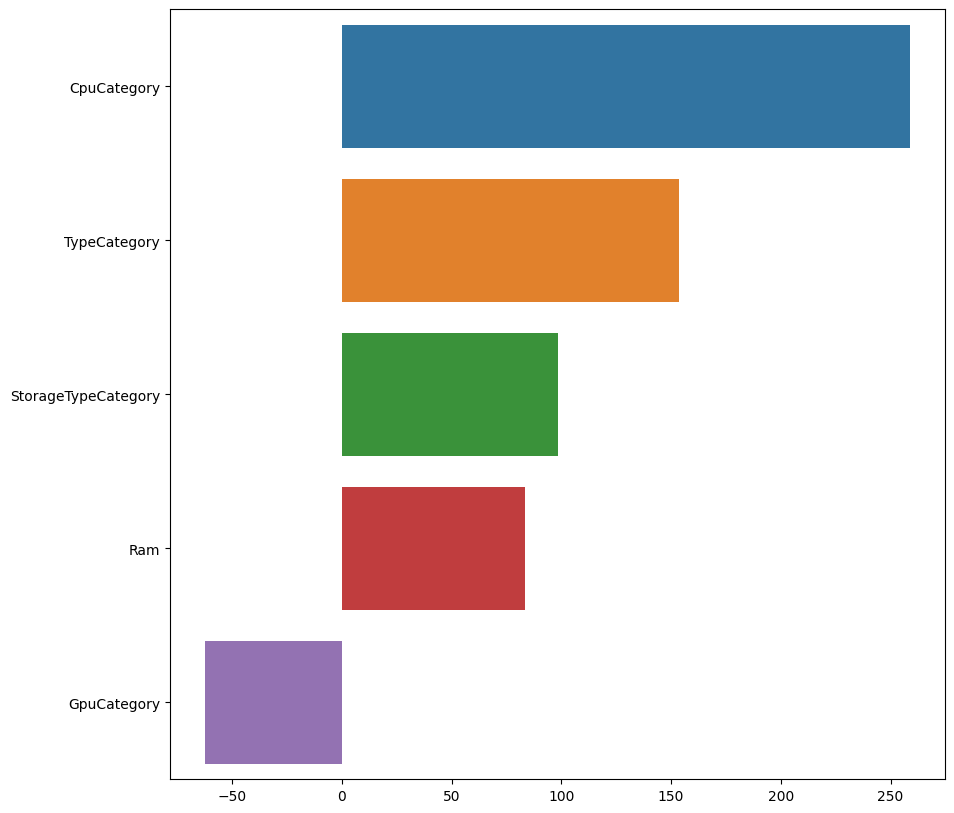

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train[numeric_features].std()), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

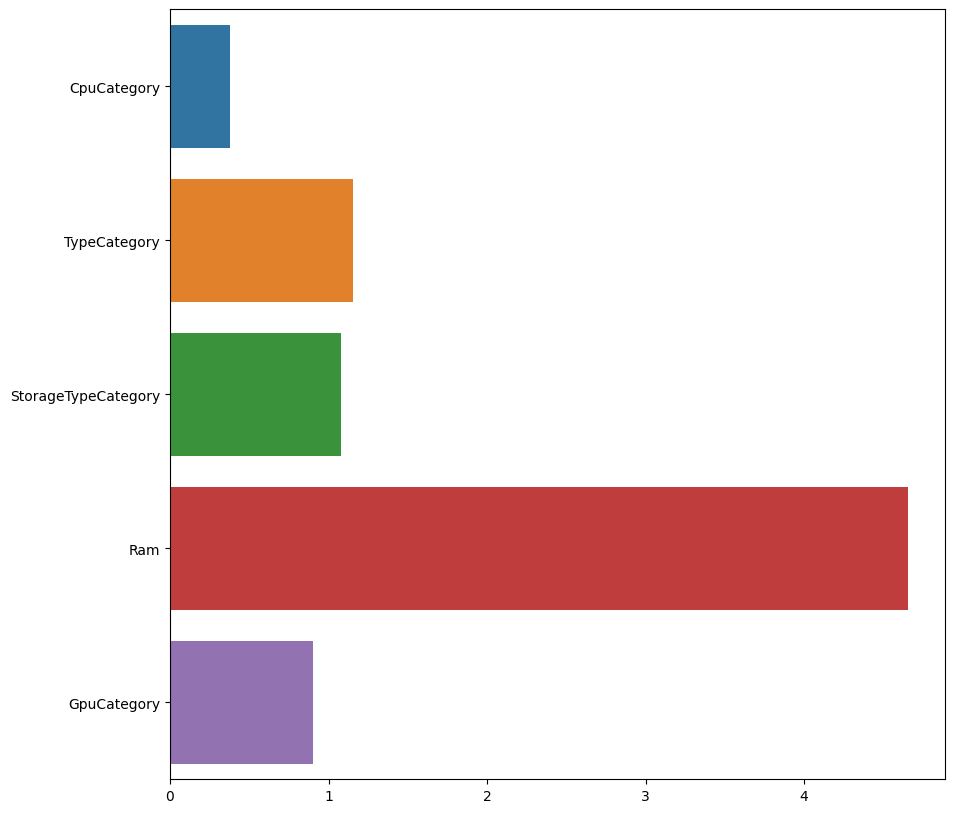

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

Test RMSE = 430.3659
Train RMSE = 381.8447


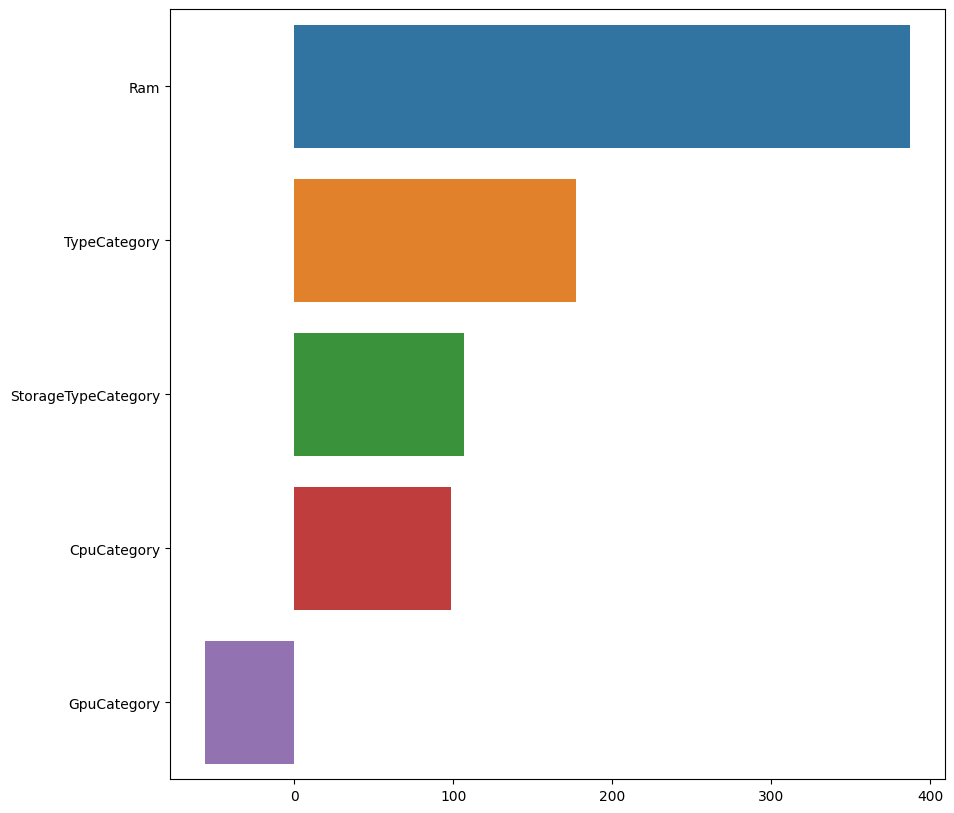

In [21]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

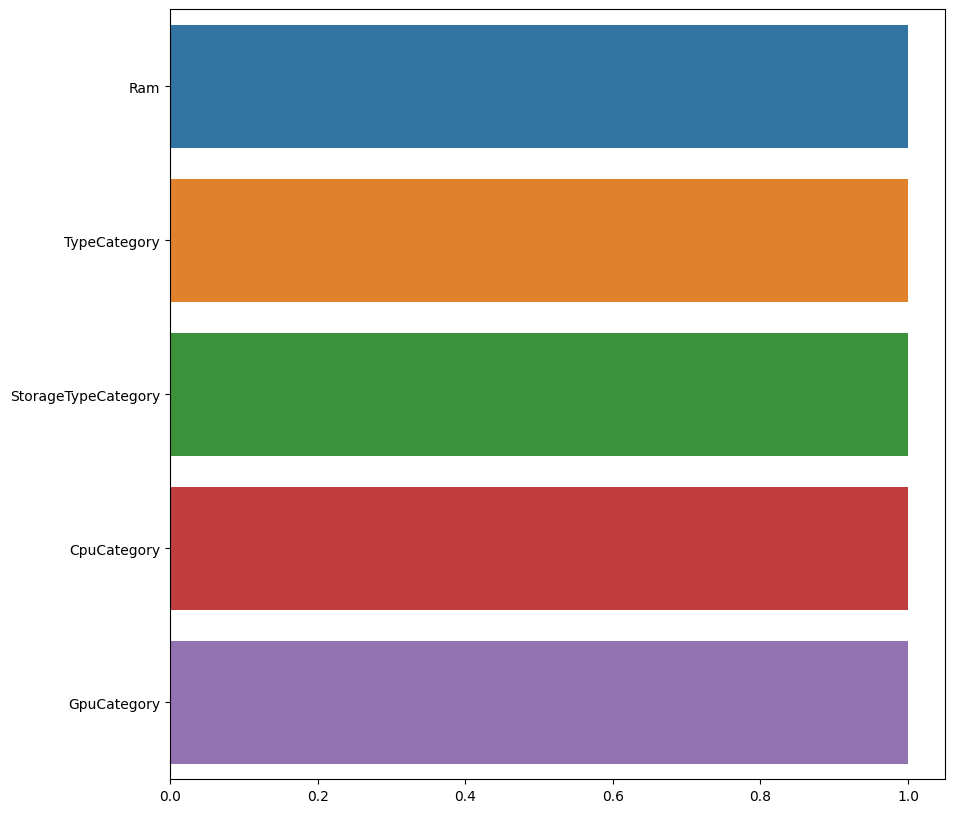

In [22]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

0.07742636826811278


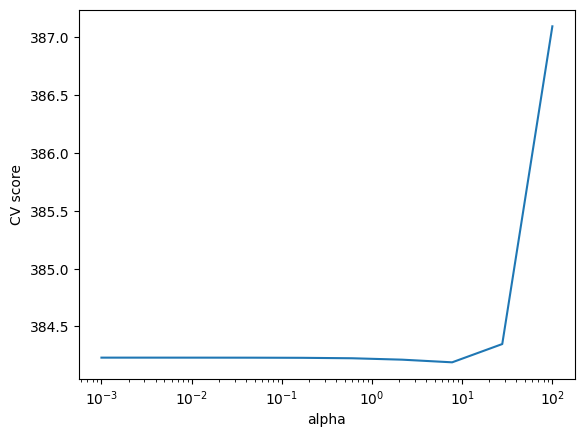

In [26]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 2, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
alpha = searcher.best_params_["alpha"]/100
print(alpha)

In [27]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE =", mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 430.4219958154725


In [28]:
#реализация градиентного спуска

In [29]:
import numpy as np
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats
from sklearn.base import BaseEstimator
from sklearn.utils.estimator_checks import check_estimator
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class GradientDescent(BaseEstimator):
    def __init__(self, alpha=0.01, numIterations=100):
        self.alpha = alpha
        self.numIterations = numIterations
    
    def fit(self,x,y):
        x,y = check_X_y(x,y) #Checking if both X & y has correct shape
        self.n_features_in_ = x.shape[1] #Setting the number of features in Input data (new as per 0.24)
        m = x.shape[0]
        self.x_ = np.c_[ np.ones(m), x] #theta0 = ones
        self.theta_ = np.ones(self.x_.shape[1])
        x_transpose = self.x_.transpose()
        
        for iter in range(0, self.numIterations):
            hypothesis = np.dot(self.x_, self.theta_)
            loss = hypothesis - y
            J = np.sum(loss ** 2) / (2 * m)  # cost
            #print ('iter= ', iter,'J= ', J)
            #print('LSE= ',J)
            gradient = np.dot(x_transpose, loss) / m         
            self.theta_ = self.theta_ - self.alpha * gradient  # update weights
            
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]
        return self #Should Return Self : Mandatory
    
    def predict(self,X_test):
        check_is_fitted(self) # Check to verify the Fit has been called
        X_test = check_array(X_test) # Validate the input
        return X_test@self.coef_+self.intercept_

In [30]:
class StochasticGradientDescent(BaseEstimator):
    def __init__(self, alpha=0.01, numIterations=100, batch_size=1):
        self.alpha = alpha
        self.numIterations = numIterations
        self.batch_size = batch_size
    
    def fit(self,x,y):
        x,y = check_X_y(x,y)
        self.n_features_in_ = x.shape[1]
        m = x.shape[0] # number of samples
        self.x_ = np.c_[ np.ones(m), x] #theta0 = ones
        self.theta_ = np.ones(self.x_.shape[1])
        random_state=1
        seed = None if random_state is None else int(random_state)
        rng = np.random.default_rng(seed=seed)
        xy = np.c_[self.x_,y]

        for iter in range(0, self.numIterations):
            rng.shuffle(xy)
            y = xy[:,xy.shape[1]-1]
            x = np.delete(xy, xy.shape[1]-1, 1)

            for start in range(0, m, self.batch_size):
                stop = start + self.batch_size
                x_batch, y_batch = x[start:stop], y[start:stop]
                x_transpose = x_batch.transpose()
                hypothesis = np.dot(x_batch, self.theta_)
                loss = hypothesis - y_batch
                J = np.sum(loss ** 2) / (2 * m)  # cost
                #print ('iter= ', iter,'J= ', J)
                #print('LSE= ',J)
                gradient = np.dot(x_transpose, loss) / m         
                self.theta_ = self.theta_ - self.alpha * gradient  # update weights
        self.coef_ = self.theta_[1:]
        self.intercept_ = self.theta_[0]
        return self
    
    def predict(self,X_test):
        check_is_fitted(self) # Check to verify the Fit has been called
        X_test = check_array(X_test) # Validate the input
        return X_test@self.coef_+self.intercept_

In [80]:
#X_test_scaled, X_train_scaled, y_train, y_test

0.1668100537200059


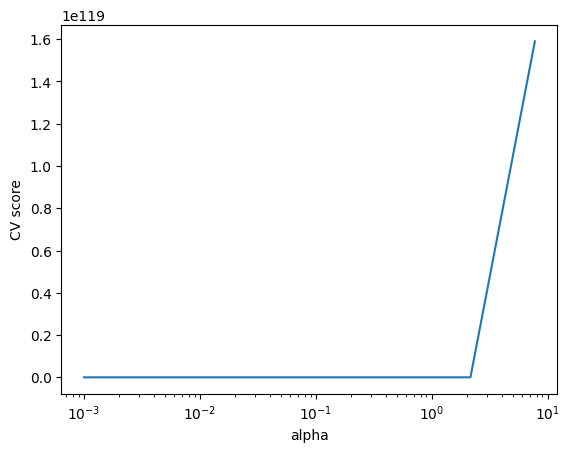

In [39]:
alpha_grid = np.logspace(-3, 2, 10)
searcher = GridSearchCV(GradientDescent(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
alpha = searcher.best_params_["alpha"]
print(alpha)

In [40]:
gd_model = GradientDescent(alpha, 450)
gd_model.fit(X_train_scaled, y_train)
gd_y_test_pred = gd_model.predict(X_test_scaled)
gd_y_train_pred = gd_model.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, gd_y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, gd_y_train_pred))
print("Test RMSE = %.4f" % mean_squared_error(y_test, gd_y_test_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, gd_y_test_pred))
from sklearn.metrics import r2_score
print("Train coefficient of determination = %.4f" % r2_score(y_train, gd_y_train_pred, force_finite=False))
print("Test coefficient of determination = %.4f" % r2_score(y_test, gd_y_test_pred, force_finite=False))

Train RMSE = 381.8444
Train MSE = 145805.1408
Test RMSE = 430.4267
Test MSE = 185267.1824
Train coefficient of determination = 0.6880
Test coefficient of determination = 0.6540


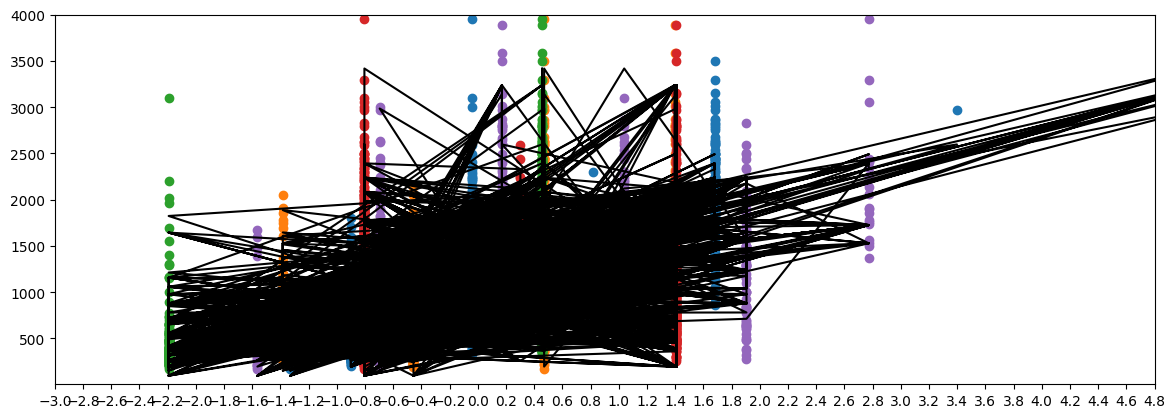

In [41]:
plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_train_scaled,y_train,'o')
pylab.plot(X_train_scaled,gd_y_train_pred,'k-')
pylab.show('train')

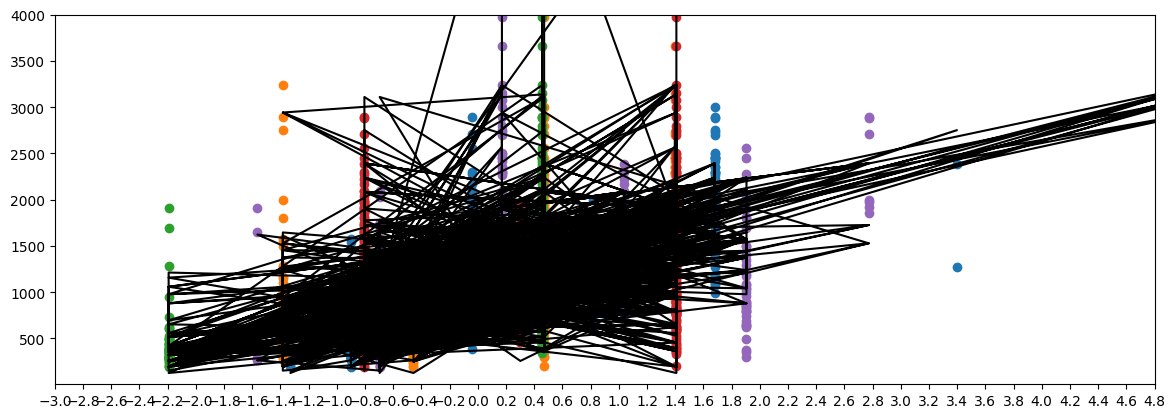

In [42]:
plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_test_scaled,y_test,'o')
pylab.plot(X_test_scaled,gd_y_test_pred,'k-')
pylab.show('test')

In [86]:
#Модель, обученная градиентным спуском, схожа с моделью Ridge библиотеки sklearn.
#После выбора лучшего альфа в качестве скорости обучения, произошло небольшое улучшение модели.

In [89]:
# sgd

0.1668100537200059


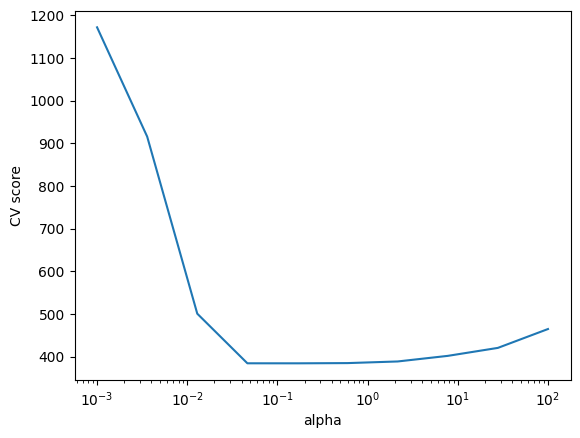

In [43]:
alpha_grid = np.logspace(-3, 2, 10)
searcher = GridSearchCV(StochasticGradientDescent(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
alpha = searcher.best_params_["alpha"]
print(alpha)

Train RMSE = 381.8444
Train MSE = 145805.1408
Test RMSE = 430.4267
Test MSE = 185267.1824
Train coefficient of determination = 0.6880
Test coefficient of determination = 0.6540


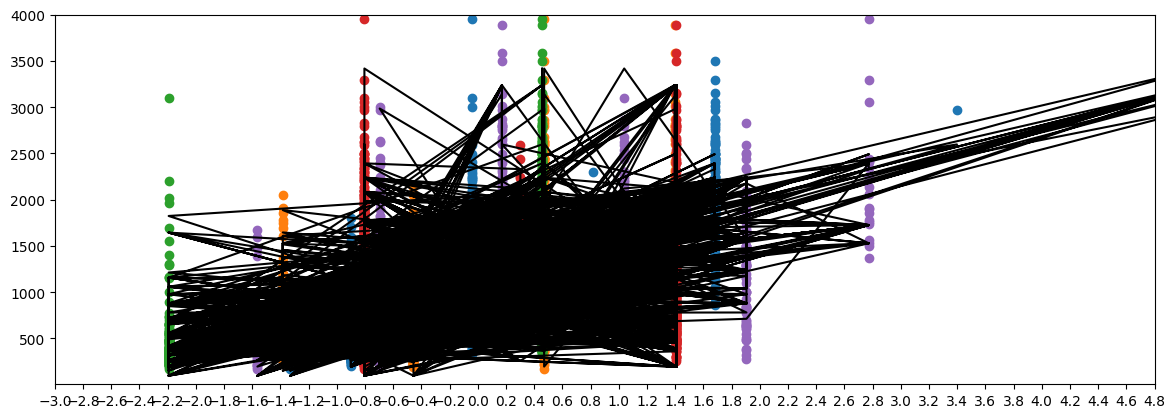

In [44]:
sgd_model = StochasticGradientDescent(alpha, 450,1)
sgd_model.fit(X_train_scaled, y_train)
sgd_y_test_pred = gd_model.predict(X_test_scaled)
sgd_y_train_pred = gd_model.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, sgd_y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, sgd_y_train_pred))
print("Test RMSE = %.4f" % mean_squared_error(y_test, sgd_y_test_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, sgd_y_test_pred))
from sklearn.metrics import r2_score
print("Train coefficient of determination = %.4f" % r2_score(y_train, sgd_y_train_pred, force_finite=False))
print("Test coefficient of determination = %.4f" % r2_score(y_test, sgd_y_test_pred, force_finite=False))

plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_train_scaled,y_train,'o')
pylab.plot(X_train_scaled,sgd_y_train_pred,'k-')
pylab.show()

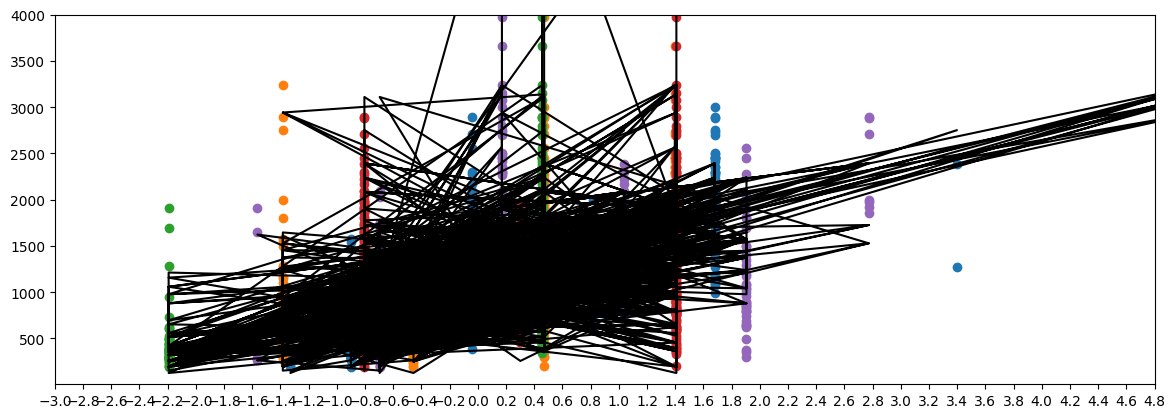

In [45]:
plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_test_scaled,y_test,'o')
pylab.plot(X_test_scaled,sgd_y_test_pred,'k-')
pylab.show()

In [ ]:
# mini-batch

Train RMSE = 381.8445
Train MSE = 145805.2129
Test RMSE = 430.4460
Test MSE = 185283.7896
Train coefficient of determination = 0.6880
Test coefficient of determination = 0.6540


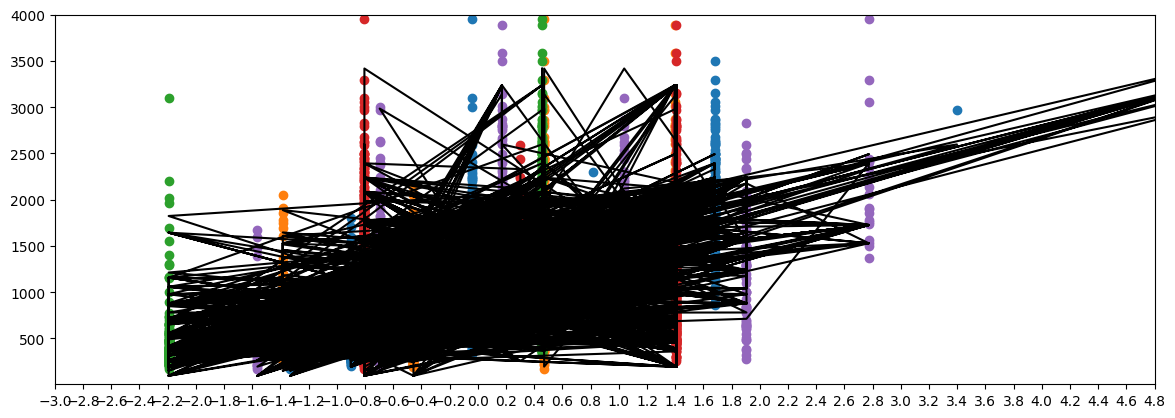

In [46]:
batch_model = StochasticGradientDescent(alpha, 450,16)
batch_model.fit(X_train_scaled, y_train)
batch_y_test_pred = batch_model.predict(X_test_scaled)
batch_y_train_pred = batch_model.predict(X_train_scaled)

print("Train RMSE = %.4f" % mean_squared_error(y_train, batch_y_train_pred, squared=False))
print("Train MSE = %.4f" % mean_squared_error(y_train, batch_y_train_pred))
print("Test RMSE = %.4f" % mean_squared_error(y_test, batch_y_test_pred, squared=False))
print("Test MSE = %.4f" % mean_squared_error(y_test, batch_y_test_pred))
from sklearn.metrics import r2_score
print("Train coefficient of determination = %.4f" % r2_score(y_train, batch_y_train_pred, force_finite=False))
print("Test coefficient of determination = %.4f" % r2_score(y_test, batch_y_test_pred, force_finite=False))

plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_train_scaled,y_train,'o')
pylab.plot(X_train_scaled,batch_y_train_pred,'k-')
pylab.show('train')

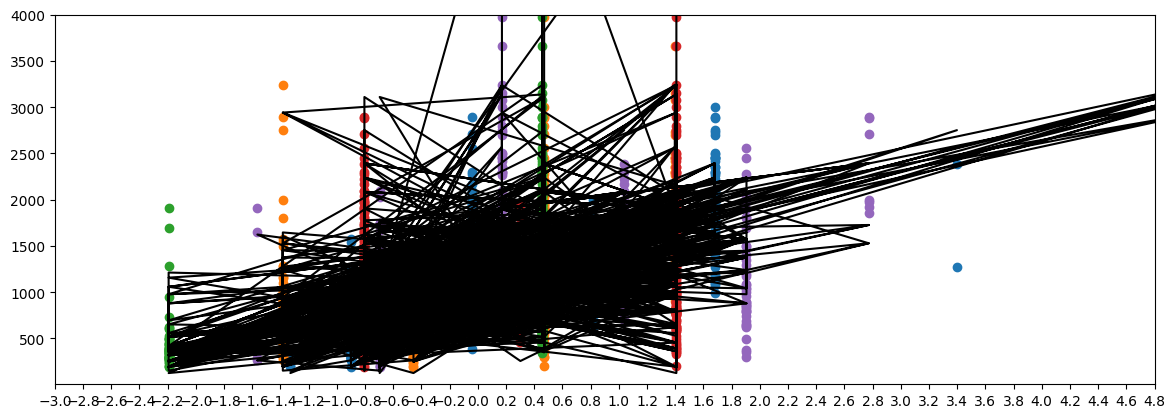

In [47]:
plt.ylim(5,4000)
plt.xlim(-3,4)
plt.xticks(np.arange(-3, 5, step=0.2))
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.9 # inch margin
s = maxsize/plt.gcf().dpi*40+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

pylab.plot(X_test_scaled,y_test,'o')
pylab.plot(X_test_scaled,batch_y_test_pred,'k-')
pylab.show()

In [ ]:
# cross-validation

In [52]:
from sklearn.model_selection import cross_val_score

ridge_mse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
ridge_mse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
ridge_rmse_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
ridge_rmse_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
ridge_r2_scores_train = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring="r2")
ridge_r2_scores_test = cross_val_score(model, X_test_scaled, y_test, cv=5, scoring="r2")

gd_mse_scores_train = cross_val_score(gd_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
gd_mse_scores_test = cross_val_score(gd_model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
gd_rmse_scores_train = cross_val_score(gd_model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
gd_rmse_scores_test = cross_val_score(gd_model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
gd_r2_scores_train = cross_val_score(gd_model, X_train_scaled, y_train, cv=5, scoring="r2")
gd_r2_scores_test = cross_val_score(gd_model, X_test_scaled, y_test, cv=5, scoring="r2")

sgd_mse_scores_train = cross_val_score(sgd_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
sgd_mse_scores_test = cross_val_score(sgd_model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
sgd_rmse_scores_train = cross_val_score(sgd_model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
sgd_rmse_scores_test = cross_val_score(sgd_model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
sgd_r2_scores_train = cross_val_score(sgd_model, X_train_scaled, y_train, cv=5, scoring="r2")
sgd_r2_scores_test = cross_val_score(sgd_model, X_test_scaled, y_test, cv=5, scoring="r2")

batch_mse_scores_train = cross_val_score(batch_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error")
batch_mse_scores_test = cross_val_score(batch_model, X_test_scaled, y_test, cv=5, scoring="neg_mean_squared_error")
batch_rmse_scores_train = cross_val_score(batch_model, X_train_scaled, y_train, cv=5, scoring="neg_root_mean_squared_error")
batch_rmse_scores_test = cross_val_score(batch_model, X_test_scaled, y_test, cv=5, scoring="neg_root_mean_squared_error")
batch_r2_scores_train = cross_val_score(batch_model, X_train_scaled, y_train, cv=5, scoring="r2")
batch_r2_scores_test = cross_val_score(batch_model, X_test_scaled, y_test, cv=5, scoring="r2")

cv_scores = np.array([ridge_mse_scores_train,ridge_mse_scores_test,ridge_rmse_scores_train,ridge_rmse_scores_test,
                     gd_mse_scores_train,gd_mse_scores_test,gd_rmse_scores_train,gd_rmse_scores_test,
                     sgd_mse_scores_train,sgd_mse_scores_test,sgd_rmse_scores_train,sgd_rmse_scores_test,
                     batch_mse_scores_train,batch_mse_scores_test,batch_rmse_scores_train,batch_rmse_scores_test,
                     ridge_r2_scores_train,ridge_r2_scores_test,gd_r2_scores_train,gd_r2_scores_test,
                     sgd_r2_scores_train,sgd_r2_scores_test,batch_r2_scores_train,batch_r2_scores_test,])

for i in range(16):
    cv_scores[i]*=-1

scores_table = pd.DataFrame(data=cv_scores,
             index=['ridge-mse-train','ridge-mse-test','ridge-rmse-train','ridge-rmse-test',
                    'gd-mse-train','gd-mse-test','gd-rmse-train','gd-rmse-test',
                   'sgd-mse-train','sgd-mse-test','sgd-rmse-train','sgd-rmse-test',
                   'batch-mse-train','batch-mse-test','batch-rmse-train','batch-rmse-test',
                   'ridge-r2-train','ridge-r2-test','gd-r2-train','gd-r2-test',
                   'sgd-r2-train','sgd-r2-test','batch-r2-train','batch-r2-test'],
             columns=['Fold1','Fold2','Fold3','Fold4','Fold5'])  


In [55]:
expected_values = np.array([np.mean(ridge_mse_scores_train), np.mean(ridge_mse_scores_test),
                           np.mean(ridge_rmse_scores_train), np.mean(ridge_rmse_scores_test),
                           np.mean(gd_mse_scores_train), np.mean(gd_mse_scores_test),
                           np.mean(gd_rmse_scores_train), np.mean(gd_rmse_scores_test),
                           np.mean(sgd_mse_scores_train), np.mean(sgd_mse_scores_test),
                           np.mean(sgd_rmse_scores_train), np.mean(sgd_rmse_scores_test),
                           np.mean(batch_mse_scores_train), np.mean(batch_mse_scores_test),
                           np.mean(batch_rmse_scores_train), np.mean(batch_rmse_scores_test),
                           np.mean(ridge_r2_scores_train), np.mean(ridge_r2_scores_test),
                           np.mean(gd_r2_scores_train), np.mean(gd_r2_scores_test),
                           np.mean(sgd_r2_scores_train), np.mean(sgd_r2_scores_test),
                           np.mean(batch_r2_scores_train), np.mean(batch_r2_scores_test)])
for i in range(16):
    expected_values[i]*=-1
std_deviation = np.array([np.std(ridge_mse_scores_train), np.std(ridge_mse_scores_test),
                           np.std(ridge_rmse_scores_train), np.std(ridge_rmse_scores_test),
                           np.std(gd_mse_scores_train), np.std(gd_mse_scores_test),
                           np.std(gd_rmse_scores_train), np.std(gd_rmse_scores_test),
                           np.std(sgd_mse_scores_train), np.std(sgd_mse_scores_test),
                           np.std(sgd_rmse_scores_train), np.std(sgd_rmse_scores_test),
                           np.std(batch_mse_scores_train), np.std(batch_mse_scores_test),
                           np.std(batch_rmse_scores_train), np.std(batch_rmse_scores_test),
                           np.std(ridge_r2_scores_train), np.std(ridge_r2_scores_test),
                           np.std(gd_r2_scores_train), np.std(gd_r2_scores_test),
                           np.std(sgd_r2_scores_train), np.std(sgd_r2_scores_test),
                           np.std(batch_r2_scores_train), np.std(batch_r2_scores_test)])
scores_table['E'] = expected_values
scores_table['STD'] = std_deviation

In [56]:
scores_table

,Fold1,Fold2,Fold3,Fold4,Fold5,E,STD
ridge-mse-train,117462.553191,111782.797828,143797.743868,181152.262636,192947.058857,149428.483276,32774.954288
ridge-mse-test,138002.390759,256352.185700,233176.327477,223036.471093,140932.545572,198299.984120,49244.561106
ridge-rmse-train,342.728104,334.339345,379.206730,425.619857,439.257395,384.230286,42.374173
ridge-rmse-test,371.486730,506.312340,482.883348,472.267372,375.409837,441.671925,56.796958
gd-mse-train,117465.365965,111784.923138,143791.011564,181147.019780,192956.730932,149429.010276,32775.702818
gd-mse-test,138036.265265,256311.412967,233156.816197,223131.202226,140920.812921,198311.301915,49236.162460
gd-rmse-train,342.732207,334.342524,379.197853,425.613698,439.268404,384.230937,42.374488
gd-rmse-test,371.532321,506.272074,482.863144,472.367656,375.394210,441.685881,56.788066
sgd-mse-train,117372.411317,111771.414374,143872.926538,181193.466980,192976.004449,149437.244732,32808.264826
sgd-mse-test,137151.723798,257873.861779,233250.693209,221557.168571,141860.842609,198338.857993,49469.130724


In [ ]:
# все использованные модели показали схожий результат